In [1]:
import numpy as np
import tensorflow as tf

C:\Users\Abhishek Mohanty\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
tokenizer = Tokenizer()
data = open('Collections.txt').read()
corpus = data.lower().split("\n")

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) +1

print(tokenizer.word_index)
print(total_words)

{'i': 1, 'the': 2, 'and': 3, 'love': 4, 'you': 5, 'a': 6, 'to': 7, 'my': 8, 'of': 9, 'your': 10, 'in': 11, 'me': 12, 'is': 13, 'that': 14, 'for': 15, 'with': 16, 'as': 17, 'be': 18, 'will': 19, 'not': 20, 'when': 21, 'her': 22, 'if': 23, 'thee': 24, 'heart': 25, 'or': 26, 'eyes': 27, 'one': 28, 'but': 29, 'without': 30, 'are': 31, 'we': 32, 'so': 33, 'it': 34, 'on': 35, 'can': 36, 'all': 37, 'at': 38, 'by': 39, 'more': 40, "can't": 41, 'have': 42, 'from': 43, 'she': 44, 'like': 45, 'feeling': 46, 'see': 47, 'do': 48, 'which': 49, 'than': 50, 'am': 51, 'life': 52, 'only': 53, 'this': 54, 'want': 55, 'they': 56, 'no': 57, 'still': 58, 'would': 59, 'who': 60, 'through': 61, 'shall': 62, 'death': 63, 'how': 64, 'beauty': 65, "i'll": 66, 'thou': 67, 'upon': 68, 'look': 69, 'just': 70, 'their': 71, 'mine': 72, 'face': 73, 'now': 74, 'never': 75, 'was': 76, 'know': 77, "you're": 78, 'red': 79, 'sun': 80, 'there': 81, 'let': 82, 'light': 83, 'last': 84, 'always': 85, 'has': 86, 'white': 87, 't

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [6]:
print(tokenizer.word_index['drink'])
print(tokenizer.word_index['to'])
print(tokenizer.word_index['me'])
print(tokenizer.word_index['only'])
print(tokenizer.word_index['with'])
print(tokenizer.word_index['thine'])
print(tokenizer.word_index['eyes'])

333
7
12
53
16
151
27


In [7]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  4 13 45]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
print(model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4722/4722 [==============================] - 29s 6ms/sample - loss: 6.4290 - acc: 0.0322
Epoch 2/20
4722/4722 [==============================] - 26s 5ms/sample - loss: 5.5604 - acc: 0.0858
Epoch 3/20
4722/4722 [==============================] - 26s 5ms/sample - loss: 4.7310 - acc: 0.1508
Epoch 4/20
4722/4722 [==============================] - 27s 6ms/sample - loss: 3.8290 - acc: 0.2302
Epoch 5/20
4722/4722 [==============================] - 27s 6ms/sample - loss: 2.8879 - acc: 0.3492
Epoch 6/20
4722/4722 [==============================] - 26s 5ms/sample - loss: 2.0708 - acc: 0.5059
Epoch 7/20
4722/4722 [==============================] - 30s 6ms/sample - loss: 1.5027 - acc: 0.6362
Epoch 8/20
4722/4722 [==============================] - 30s 6ms/sample - loss: 1.1063 - acc: 0.7287
Epoch 9/20
4722/4722 [==============================] - 26s 6ms/sample - loss: 0

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

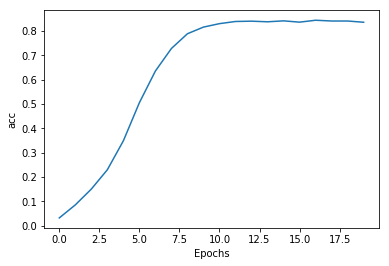

In [11]:
plot_graphs(history, 'acc')

In [18]:
seed_text = "It"
next_words = 60
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

It could not withered be all they support you without feeling great about you care how when to your eyes dilate the light of me tonight to take me off this off to take me off to take me off this earth earth earth earth take we arms and night style last me take me beat from this i'd hear her
